# HW5 (Classification with Neural Network)

### Netid : aadcosta ###
### Seating Pin : 79 ###

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt
from keras.regularizers import l1,l2
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import classification_report


In [2]:
keras.utils.set_random_seed(3)

##### Extract features and label for the data

In [3]:
# Load your dataset (replace 'data.csv' with your actual data file)
data = pd.read_csv('E:\MS\MS_studies\Sem_2\IntrotoML\HW3\\71-80.csv')

In [4]:
data = data.iloc[:, [3,4,5,6,7,8]]

In [5]:
data

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022
0,104,99,104,90,70,65
1,64,75,63,47,59,47
2,840,699,668,576,631,613
3,43,57,80,92,81,81
4,8,60,31,102,134,202
...,...,...,...,...,...,...
95,442,443,404,355,385,333
96,1307,1557,1814,1958,1926,1827
97,493,520,450,474,412,338
98,37,30,51,53,67,53


##### Normalize the features[ Both X and Y]

In [6]:
scaler = MinMaxScaler()

scaled_arr = scaler.fit_transform(data)

In [7]:
data.columns

Index(['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021', 'cit_2022'], dtype='object')

In [8]:
scaled_df = pd.DataFrame(scaled_arr, columns=data.columns[0:6])

In [9]:
scaled_df

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022
0,0.037763,0.033480,0.035167,0.027132,0.022774,0.021160
1,0.023239,0.025364,0.020891,0.013243,0.018979,0.015017
2,0.305011,0.236388,0.231546,0.184109,0.216356,0.208191
3,0.015614,0.019276,0.026811,0.027778,0.026570,0.026621
4,0.002905,0.020291,0.009749,0.031008,0.044859,0.067918
...,...,...,...,...,...,...
95,0.160494,0.149814,0.139624,0.112726,0.131470,0.112628
96,0.474582,0.526547,0.630571,0.630491,0.663216,0.622526
97,0.179012,0.175854,0.155641,0.151163,0.140787,0.114334
98,0.013435,0.010145,0.016713,0.015181,0.021739,0.017065


##### Calculate ratio between cit_2021 and cit_2022

In [10]:

scaled_df["ratio_21_22"] = round(data["cit_2022"] / data["cit_2021"],2)
scaled_df.fillna(0, inplace=True)


In [11]:
# Categorize the ratios
scaled_df["category"] = pd.cut(scaled_df["ratio_21_22"],bins=[-np.inf,1.05, 1.16, np.inf],labels=["Low", "Medium", "High"])

##### Split the data into training and testing sets

In [12]:
trained_data, test_data = train_test_split(scaled_df,test_size=0.2, random_state=20)

In [13]:
trained_data

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,ratio_21_22,category
37,0.108569,0.113967,0.139972,0.097222,0.087302,0.087713,1.01,Low
51,0.064270,0.056814,0.059889,0.053295,0.054865,0.054608,1.00,Low
35,0.035585,0.039567,0.024373,0.041344,0.020014,0.023208,1.15,Medium
65,0.022513,0.036524,0.039694,0.045543,0.054865,0.058020,1.06,Medium
31,0.187364,0.180588,0.176532,0.199935,0.210490,0.216724,1.04,Low
...,...,...,...,...,...,...,...,...
28,0.219680,0.202232,0.217270,0.232881,0.315390,0.332082,1.06,Medium
95,0.160494,0.149814,0.139624,0.112726,0.131470,0.112628,0.86,Low
15,0.014887,0.019953,0.019847,0.027455,0.030021,0.052218,1.71,High
90,0.041757,0.042273,0.044220,0.036499,0.046239,0.058020,1.25,High


In [14]:
test_data

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,ratio_21_22,category
70,0.104938,0.104498,0.158426,0.186693,0.251553,0.308532,1.24,High
74,0.292665,0.222185,0.188022,0.140504,0.138026,0.132765,0.97,Low
2,0.305011,0.236388,0.231546,0.184109,0.216356,0.208191,0.97,Low
44,0.228758,0.221170,0.274373,0.267765,0.265355,0.240956,0.92,Low
56,0.029775,0.036185,0.019150,0.024871,0.027260,0.031058,1.13,Medium
48,0.049746,0.063578,0.067549,0.072351,0.106280,0.151195,1.43,High
12,0.062092,0.066622,0.091226,0.094315,0.105590,0.097611,0.93,Low
36,0.057008,0.049713,0.052228,0.032300,0.048654,0.041297,0.86,Low
0,0.037763,0.033480,0.035167,0.027132,0.022774,0.021160,0.93,Low
49,0.963689,0.918160,0.933844,0.902455,0.924086,0.809215,0.89,Low


##### Checking the data for skewness

In [15]:
scaled_df['category'].value_counts()

Low       58
High      29
Medium    13
Name: category, dtype: int64

##### Define the model for NN training 

In [16]:
# Create a Sequential model
model = Sequential()

# Add a hidden layer with 6 neurons and ReLU activation
model.add(Dense(6, input_dim=6, activation='relu'))

# Add the output layer with 3 neurons (for classification task)
model.add(Dense(3, activation='softmax'))  
# Choose an optimizer with the current learning rate
custom_optimizer = Adam(learning_rate=0.001)


##### Training neural network with best learning rate = 0.001 and suitable optimizer with min loss in my case ADAM and activation func RELU as captured in the previous homework

In [17]:
# Compile the model
model.compile(optimizer=custom_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

##### Prepare the train data

In [18]:
X_train = trained_data.iloc[:, 0:6]

In [19]:
X_train

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022
37,0.108569,0.113967,0.139972,0.097222,0.087302,0.087713
51,0.064270,0.056814,0.059889,0.053295,0.054865,0.054608
35,0.035585,0.039567,0.024373,0.041344,0.020014,0.023208
65,0.022513,0.036524,0.039694,0.045543,0.054865,0.058020
31,0.187364,0.180588,0.176532,0.199935,0.210490,0.216724
...,...,...,...,...,...,...
28,0.219680,0.202232,0.217270,0.232881,0.315390,0.332082
95,0.160494,0.149814,0.139624,0.112726,0.131470,0.112628
15,0.014887,0.019953,0.019847,0.027455,0.030021,0.052218
90,0.041757,0.042273,0.044220,0.036499,0.046239,0.058020


##### Encode categorical data to convert to numerical data

In [20]:
le = LabelEncoder()
y_train = le.fit_transform(trained_data["category"])
# Y data to one hot encoded form
y_train = keras.utils.to_categorical(y_train, num_classes=3)


In [21]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1

In [22]:
random_oversampler = RandomOverSampler(random_state=2)
X_resampled, y_resampled = random_oversampler.fit_resample(X_train,y_train)

##### Train the model

In [23]:
model.fit(X_resampled, y_resampled, epochs=750, batch_size=32)

Epoch 1/750
5/5 [==============================] - 1s 3ms/step - loss: 1.0907 - accuracy: 0.4470
Epoch 2/750
5/5 [==============================] - 0s 3ms/step - loss: 1.0888 - accuracy: 0.4773
Epoch 3/750
5/5 [==============================] - 0s 2ms/step - loss: 1.0878 - accuracy: 0.4394
Epoch 4/750
5/5 [==============================] - 0s 3ms/step - loss: 1.0867 - accuracy: 0.4394
Epoch 5/750
5/5 [==============================] - 0s 2ms/step - loss: 1.0859 - accuracy: 0.4470
Epoch 6/750
5/5 [==============================] - 0s 3ms/step - loss: 1.0849 - accuracy: 0.4924
Epoch 7/750
5/5 [==============================] - 0s 2ms/step - loss: 1.0840 - accuracy: 0.5000
Epoch 8/750
5/5 [==============================] - 0s 3ms/step - loss: 1.0832 - accuracy: 0.4621
Epoch 9/750
5/5 [==============================] - 0s 2ms/step - loss: 1.0825 - accuracy: 0.4470
Epoch 10/750
5/5 [==============================] - 0s 1ms/step - loss: 1.0818 - accuracy: 0.4470
Epoch 11/750
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 1.0650 - accuracy: 0.4242
Epoch 38/750
5/5 [==============================] - 0s 2ms/step - loss: 1.0646 - accuracy: 0.4394
Epoch 39/750
5/5 [==============================] - 0s 2ms/step - loss: 1.0640 - accuracy: 0.4545
Epoch 40/750
5/5 [==============================] - 0s 2ms/step - loss: 1.0634 - accuracy: 0.4470
Epoch 41/750
5/5 [==============================] - 0s 2ms/step - loss: 1.0629 - accuracy: 0.4545
Epoch 42/750
5/5 [==============================] - 0s 3ms/step - loss: 1.0624 - accuracy: 0.4545
Epoch 43/750
5/5 [==============================] - 0s 3ms/step - loss: 1.0618 - accuracy: 0.4545
Epoch 44/750
5/5 [==============================] - 0s 3ms/step - loss: 1.0613 - accuracy: 0.4545
Epoch 45/750
5/5 [==============================] - 0s 3ms/step - loss: 1.0606 - accuracy: 0.4545
Epoch 46/750
5/5 [==============================] - 0s 2ms/step - loss: 1.0602 - accuracy: 0.4470
Epoch 47/750
5/5 [===============

##### Prepare test data

In [24]:

X_test = test_data.iloc[:, 0:6]

In [25]:
X_test

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022
70,0.104938,0.104498,0.158426,0.186693,0.251553,0.308532
74,0.292665,0.222185,0.188022,0.140504,0.138026,0.132765
2,0.305011,0.236388,0.231546,0.184109,0.216356,0.208191
44,0.228758,0.221170,0.274373,0.267765,0.265355,0.240956
56,0.029775,0.036185,0.019150,0.024871,0.027260,0.031058
48,0.049746,0.063578,0.067549,0.072351,0.106280,0.151195
12,0.062092,0.066622,0.091226,0.094315,0.105590,0.097611
36,0.057008,0.049713,0.052228,0.032300,0.048654,0.041297
0,0.037763,0.033480,0.035167,0.027132,0.022774,0.021160
49,0.963689,0.918160,0.933844,0.902455,0.924086,0.809215


In [26]:
y_test = le.transform(test_data["category"])
y_test = keras.utils.to_categorical(y_test, num_classes=3)

In [27]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

##### Make predictions on the test data

In [28]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
predicted_categories = le.inverse_transform(y_pred_classes)



1/1 [==============================] - 0s 74ms/step


In [29]:

y_pred_res = le.fit_transform(predicted_categories)
# Y data to one hot encoded form
y_pred_res = keras.utils.to_categorical(y_pred_res, num_classes=3)


In [30]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)
print("Predicted categories:", predicted_categories)

1/1 [==============================] - 0s 145ms/step - loss: 0.7256 - accuracy: 0.6500
Test accuracy: 0.6499999761581421
Predicted categories: ['High' 'Low' 'Low' 'Low' 'Medium' 'High' 'Medium' 'Low' 'Medium' 'Low'
 'Low' 'High' 'High' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'Medium']


In [31]:
y_pred

array([[7.5143749e-01, 6.5592036e-02, 1.8297045e-01],
       [8.0712298e-03, 7.1820974e-01, 2.7371904e-01],
       [7.9295579e-03, 7.0854926e-01, 2.8352123e-01],
       [2.1707986e-02, 6.3345450e-01, 3.4483752e-01],
       [3.0983946e-01, 3.1919444e-01, 3.7096605e-01],
       [5.8158374e-01, 1.4603098e-01, 2.7238527e-01],
       [2.8411040e-01, 3.3033180e-01, 3.8555783e-01],
       [2.0279337e-01, 4.0258667e-01, 3.9462003e-01],
       [2.3681404e-01, 3.7850463e-01, 3.8468128e-01],
       [1.7849568e-07, 9.6334338e-01, 3.6656469e-02],
       [3.4478299e-02, 6.1823589e-01, 3.4728584e-01],
       [4.2133325e-01, 2.5036064e-01, 3.2830605e-01],
       [3.8710827e-01, 2.7234286e-01, 3.4054884e-01],
       [9.9764444e-02, 5.1830328e-01, 3.8193229e-01],
       [4.0816009e-01, 2.5711644e-01, 3.3472347e-01],
       [3.1071555e-02, 6.3194287e-01, 3.3698556e-01],
       [5.3014421e-01, 1.7721671e-01, 2.9263902e-01],
       [2.5609173e-03, 7.5300205e-01, 2.4443699e-01],
       [2.6404448e-06, 9.367

In [32]:
y_pred_res

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [33]:
y_pred_categorical = np.argmax(y_pred_res, axis=1)
y_true_categorical = np.argmax(y_test, axis=1)

In [34]:
y_true_categorical

array([0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1],
      dtype=int64)

##### Obtaining F1-Score for data

In [35]:

f1 = f1_score(y_true_categorical, y_pred_categorical, average='weighted')  # You can choose 'micro', 'macro', or 'weighted'

print(f"F1-Score: {f1:.2f}")

F1-Score: 0.67


In [45]:
y_pred_res

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

##### Using AUC score for classification to capture models ability to distinguish classes

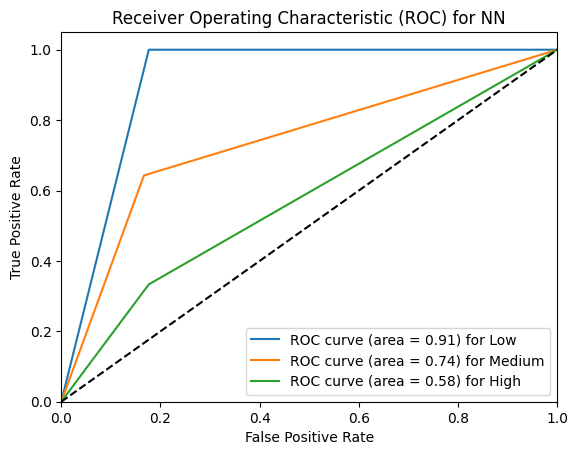

In [46]:
n_classes = 3  # Assuming 3 classes (Low, Medium, High)

# Compute ROC-AUC for each class
roc_auc = {}
fpr = {}
tpr = {}
thresholds = {}

class_names = ['Low', 'Medium','High']  # Replace with your actual class names

# Calculate ROC-AUC for each class and plot ROC curves
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_res[:, i])
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred_res[:, i])
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for NN')
plt.legend(loc="lower right")
plt.show()

In [42]:
classification_rep = classification_report(y_test, y_pred_res)

In [44]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.90      0.64      0.75        14
           2       0.25      0.33      0.29         3

   micro avg       0.65      0.65      0.65        20
   macro avg       0.55      0.66      0.57        20
weighted avg       0.74      0.65      0.67        20
 samples avg       0.65      0.65      0.65        20



##### Save the Model

In [37]:
# Save the model to a file
model.save('trained_model.h5')

c:\Users\Arlene\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### Load the saved model

In [38]:
loaded_model = keras.models.load_model('trained_model.h5')

y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
predicted_categories = le.inverse_transform(y_pred_classes)

1/1 [==============================] - 0s 45ms/step


In [39]:
predicted_categories

array(['High', 'Low', 'Low', 'Low', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'Medium'], dtype=object)